In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_classification
from time import time

Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Обозначьте целевую переменную за `y`, а остальные данные за `X`

In [3]:
data = fetch_openml(name='diggle_table_a2', version=1, as_frame=True)
data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':      col_2  col_3  col_4  col_5   col_6   col_7   col_8   col_9
 0       33     33  262.0  307.0  1.1718  5.5683  5.7268  0.1585
 1       34     34  259.0  306.0  1.1815  5.5568  5.7236  0.1668
 2       35     35  257.0  306.0  1.1907  5.5491  5.7236  0.1745
 3       36     36  262.0  306.0  1.1679  5.5683  5.7236  0.1553
 4       37     37  264.0  306.0  1.1591  5.5759  5.7236  0.1477
 ..     ...    ...    ...    ...     ...     ...     ...     ...
 305     20    436  495.0  786.0  1.5879  6.2046  6.6670  0.4624
 306     21    437  495.0  786.0  1.5879  6.2046  6.6670  0.4624
 307     22    438  497.0  786.0  1.5815  6.2086  6.6670  0.4584
 308     25    441  496.0  786.0  1.5847  6.2066  6.6670  0.4604
 309     26    442  499.0  786.0  1.5752  6.2126  6.6670  0.4544
 
 [310 rows x 8 columns],
 'target': 0      76
 1      76
 2      76
 3      76
 4      76
        ..
 305    84
 306    84
 307    84
 308    84
 309    84
 Name: col_1, Length: 310, dtype: category
 Categories

In [4]:
data.DESCR

'**Author**:   \n**Source**: Unknown - Date unknown  \n**Please cite**:   \n\nDATA-SETS FROM DIGGLE, P.J. (1990). TIME SERIES : A BIOSTATISTICAL\nINTRODUCTION. Oxford University Press.\n\nTable: Table A2 Wool prices\n\n\nInformation about the dataset\nCLASSTYPE: numeric\nCLASSINDEX: none specific\n\nDownloaded from openml.org.'

In [5]:
X = data.data
y = data.target

In [14]:
dataset = pd.DataFrame(data.data, columns = data.feature_names)
dataset['target'] = y
dataset

,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target
0,33,33,262.0,307.0,1.1718,5.5683,5.7268,0.1585,76
1,34,34,259.0,306.0,1.1815,5.5568,5.7236,0.1668,76
2,35,35,257.0,306.0,1.1907,5.5491,5.7236,0.1745,76
3,36,36,262.0,306.0,1.1679,5.5683,5.7236,0.1553,76
4,37,37,264.0,306.0,1.1591,5.5759,5.7236,0.1477,76
...,...,...,...,...,...,...,...,...,...
305,20,436,495.0,786.0,1.5879,6.2046,6.6670,0.4624,84
306,21,437,495.0,786.0,1.5879,6.2046,6.6670,0.4624,84
307,22,438,497.0,786.0,1.5815,6.2086,6.6670,0.4584,84
308,25,441,496.0,786.0,1.5847,6.2066,6.6670,0.4604,84


Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам, количество классов (значений целевой переменной).

In [7]:
print(dataset.shape)
print('\n     тип данных каждого поля\n',dataset.dtypes)
print('\n     количество значений в каждом столбцe\n', dataset.count())
print('\n     шкала измерения каждого численного поля\n', dataset.describe())

(310, 9)

     тип данных каждого поля
 col_2        int64
col_3        int64
col_4      float64
col_5      float64
col_6      float64
col_7      float64
col_8      float64
col_9      float64
target    category
dtype: object

     количество значений в каждом столбцe
 col_2     310
col_3     310
col_4     310
col_5     310
col_6     310
col_7     310
col_8     310
col_9     310
target    310
dtype: int64

     шкала измерения каждого численного поля
             col_2       col_3       col_4       col_5       col_6       col_7  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    26.587097  234.922581  387.183871  496.103226    1.265265    5.943422   
std     15.335635  120.804559   66.762306  124.330267    0.116450    0.178233   
min      2.000000   33.000000  257.000000  306.000000    1.077800    5.549100   
25%     12.000000  127.250000  316.000000  357.000000    1.155950    5.755700   
50%     25.000000  233.500000  405.000000  524.000000    1.

In [8]:
dataset = pd.DataFrame(data.data, columns = data.feature_names)
dataset['target'] = y
num_rows = X.shape[0]
num_columns = X.shape[1]
num_classes = len(np.unique(y))
stats = X.describe()

print(f"Число строк (объектов): {num_rows}")
print(f"Число столбцов (признаков): {num_columns}")
print(f"Статистика по признакам:\\n{stats}")
print(f"Количество классов (значений целевой переменной): {num_classes}")

Число строк (объектов): 310
Число столбцов (признаков): 8
Статистика по признакам:\n            col_2       col_3       col_4       col_5       col_6       col_7  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    26.587097  234.922581  387.183871  496.103226    1.265265    5.943422   
std     15.335635  120.804559   66.762306  124.330267    0.116450    0.178233   
min      2.000000   33.000000  257.000000  306.000000    1.077800    5.549100   
25%     12.000000  127.250000  316.000000  357.000000    1.155950    5.755700   
50%     25.000000  233.500000  405.000000  524.000000    1.272000    6.003900   
75%     41.000000  338.750000  434.500000  576.000000    1.323075    6.074150   
max     51.000000  442.000000  499.000000  791.000000    1.604500    6.212600   

           col_8       col_9  
count  310.00000  310.000000  
mean     6.17463    0.231207  
std      0.25636    0.089691  
min      5.72360    0.075000  
25%      5.87770    0.144925  


Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, ве признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [9]:
# 3. Проверка данных на пригодность для моделирования
if X.isnull().values.any():
    X = X.fillna(X.mean())
if not X.dtypes.apply(pd.api.types.is_numeric_dtype).all():
    X = X.apply(pd.to_numeric)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   col_2   310 non-null    int64   
 1   col_3   310 non-null    int64   
 2   col_4   310 non-null    float64 
 3   col_5   310 non-null    float64 
 4   col_6   310 non-null    float64 
 5   col_7   310 non-null    float64 
 6   col_8   310 non-null    float64 
 7   col_9   310 non-null    float64 
 8   target  310 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 20.2 KB


In [11]:
non_colums=dataset.select_dtypes(exclude=['float64','int64']).columns

In [12]:
dataset=dataset.drop(non_colums,axis=1)

In [15]:
missing_val_x=X.isnull().sum() # рассматривая подробнее по ппеременной х
missing_val_y=dataset['target'].isnull().sum() # рассматривая подробнее по ппеременной y
if missing_val_x.sum()==0 and missing_val_y==0:
  print('пропущенных значений нет (☞ ͡° ͜ʖ ͡°)☞')
else:
  dataset.fillna(dataset.median(),inplace=True)
  print('пропущенные значения были, но заменены медианными значениями (▀ Ĺ̯▀  )')

пропущенных значений нет (☞ ͡° ͜ʖ ͡°)☞


Обучите модель логистической регрессии на рассматриваемых данных из библиотеки `sklearn`. Рассчитайте метрики accuracy и выведите таблицу классификации.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#разделение данных на обучающую и тестовую выборки с помощью функции train_test_split, обучение модели на обучающих данных с помощью метода fit,
#предсказание значений на тестовых данных с помощью метода predict, и вывод метрик классификации с помощью функции classification_repo
scaler = StandardScaler()#для стандартизации
X_train_scaled = scaler.fit_transform(X_train)#матрица признаков обучающего набора данных.  вычисляет среднее и стандартное отклонение каждого признака из X_train а затем стандартизирует данные путем вычитания среднего значения и деления на стандартное отклонение
X_test_scaled = scaler.transform(X_test)#матрица признаков тестового набора данных.  использует средние и стандартные отклонения, вычисленные на этапе обучения (fit_transform) для стандартизации данных тестового набора

#данные в X_train_scaled и X_test_scaled будут стандартизированы, что может быть полезно
#для многих алгоритмов машинного обучения, особенно для тех, которые чувствительны к различным масштабам признаков.

In [21]:

start_time = time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
end_time = time()
logreg_time = end_time - start_time

y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

In [ ]:
print(f"Метрика accuracy для логистической регрессии: {accuracy_logreg}")
#Значение метрики (0,92) показывает, что модель в среднем делает ошибки в 8% процентов случаев. Это основной показатель качества модели

Метрика accuracy для логистической регрессии: 0.9193548387096774


In [22]:
print("Таблица классификации для логистической регрессии:\n", report_logreg)

Таблица классификации для логистической регрессии:
               precision    recall  f1-score   support

          76       1.00      0.80      0.89         5
          77       0.88      1.00      0.93         7
          78       0.91      1.00      0.95        10
          79       1.00      0.86      0.92         7
          80       0.86      1.00      0.92         6
          81       1.00      0.90      0.95        10
          82       0.86      1.00      0.92         6
          83       0.83      0.83      0.83         6
          84       1.00      0.80      0.89         5

    accuracy                           0.92        62
   macro avg       0.93      0.91      0.91        62
weighted avg       0.93      0.92      0.92        62



In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


In [ ]:
class LogReg(SGD):

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [ ]:
logreg = LogReg()

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [ ]:
cloud = fetch_openml(name='cloud', version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = data.data
y = data.target

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [ ]:
logistic.fit(X, y)
print("Coefficients: \n", logistic.coef_[0])
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Coefficients: 
 [ 4.64997338e-01 -1.72579485e+00  4.87054608e-01  1.19188446e-01
  4.47707591e-03  2.48663969e-02  2.45741181e-02 -2.92278714e-04]
col_2 0.4649973382435579
col_3 -1.7257948452159884
col_4 0.48705460780954374
col_5 0.11918844580119742
col_6 0.0044770759083730014
col_7 0.024866396855795524
col_8 0.024574118141832364
col_9 -0.00029227871396026654


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76


<Axes: >

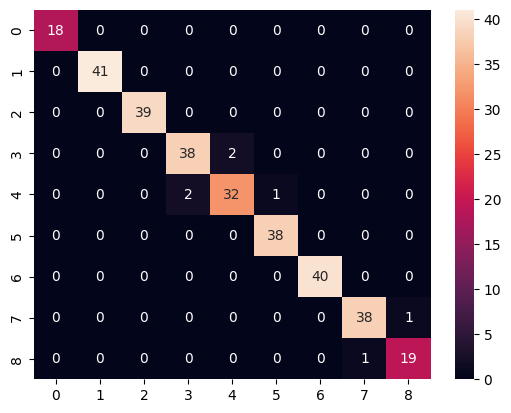

In [ ]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)#матрицa ошибок, которая позволяет оценить производительность модели по классам
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)


Обучите полиномиальную модель классификации. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные степени полинома и выберите ту, которая работает лучше.

In [ ]:
best_degree = 0 #вмосто того чтобы вручную их сравнивать напишу сразу в цикл проверку на степень
best_accuracy_poly = 0
best_report_poly = ""
#инициализируют переменные для отслеживания наилучшей степени полинома наивысшей достигнутой точности и  отчета о классификации

In [ ]:
for degree in range(2, 6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    start_time = time()
    logreg_poly = LogisticRegression(max_iter=1000)
    logreg_poly.fit(X_train_poly, y_train)
    end_time = time()
    poly_time = end_time - start_time

    y_pred_poly = logreg_poly.predict(X_test_poly)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)#точность предсказаний модели на тестовых данных.
    report_poly = classification_report(y_test, y_pred_poly)#отчет о классификации для оценки производительности модели

    if accuracy_poly > best_accuracy_poly: #супер степень (eсли текущая точность больше чем наилучшая ранее достигнутая точность то обновляются переменные best_accuracy_poly, best_report_poly и best_degree для отслеживания лучшей степени полинома и  отчета о классификации)
        best_accuracy_poly = accuracy_poly
        best_report_poly = report_poly
        best_degree = degree

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(f"Лучшая степень полинома: {best_degree}")

Лучшая степень полинома: 2


In [ ]:
print(f"Метрика accuracy для полиномиальной модели: {best_accuracy_poly}")

Метрика accuracy для полиномиальной модели: 0.9838709677419355


In [ ]:
print("Таблица классификации для полиномиальной модели:\\n", best_report_poly)

Таблица классификации для полиномиальной модели:\n               precision    recall  f1-score   support

          76       1.00      1.00      1.00         5
          77       1.00      1.00      1.00         7
          78       1.00      1.00      1.00        10
          79       1.00      1.00      1.00         7
          80       1.00      1.00      1.00         6
          81       1.00      1.00      1.00        10
          82       1.00      1.00      1.00         6
          83       0.86      1.00      0.92         6
          84       1.00      0.80      0.89         5

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.99      0.98      0.98        62



Обучите модель классификации по методу опорных векторов. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные ядерные функции и выберите ту, которая работает лучше.


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']#список типов яде (rbf-ядро ​​радиальной базисной функции. жесть)
best_kernel_svm = ""
best_accuracy_svm = 0
best_report_svm = ""#инициализируют переменные для отслеживания наилучшего типа ядра, наивысшей достигнутой точности и отчета о классификации

In [ ]:
for kernel in kernels:
    start_time = time()
    svm = SVC(kernel=kernel)#объект модели метода опорных векторов (SVM) с указанным типом ядра
    svm.fit(X_train_scaled, y_train)
    end_time = time()
    svm_time = end_time - start_time

    y_pred_svm = svm.predict(X_test_scaled)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)#точность предсказаний модели на тестовых данных
    report_svm = classification_report(y_test, y_pred_svm)#отчет о классификации для оценки производительности модел

    if accuracy_svm > best_accuracy_svm:#eсли текущая точность больше, чем наилучшая ранее достигнутая точность то обновляются переменные best_accuracy_svm, best_report_svm и best_kernel_svm для отслеживания лучшего типа ядра и отчета о классификации
        best_accuracy_svm = accuracy_svm
        best_report_svm = report_svm
        best_kernel_svm = kernel

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Лучшая ядерная функция для метода опорных векторов: {best_kernel_svm}")

Лучшая ядерная функция для метода опорных векторов: linear


In [ ]:
print(f"Метрика accuracy для метода опорных векторов: {best_accuracy_svm}")

Метрика accuracy для метода опорных векторов: 0.967741935483871


In [ ]:
print("Таблица классификации для метода опорных векторов:\\n", best_report_svm)

Таблица классификации для метода опорных векторов:\n               precision    recall  f1-score   support

          76       1.00      0.80      0.89         5
          77       0.88      1.00      0.93         7
          78       1.00      1.00      1.00        10
          79       1.00      1.00      1.00         7
          80       1.00      1.00      1.00         6
          81       1.00      1.00      1.00        10
          82       1.00      1.00      1.00         6
          83       0.86      1.00      0.92         6
          84       1.00      0.80      0.89         5

    accuracy                           0.97        62
   macro avg       0.97      0.96      0.96        62
weighted avg       0.97      0.97      0.97        62



Обучите модель классификации Перцептрон. Рассчитайте метрики accuracy и выведите таблицу классификации

In [ ]:
start_time = time()
perceptron = MLPClassifier(max_iter=1000)
perceptron.fit(X_train_scaled, y_train)
end_time = time()
perceptron_time = end_time - start_time

y_pred_perceptron = perceptron.predict(X_test_scaled)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)#точность предсказаний модели на тестовых данных
report_perceptron = classification_report(y_test, y_pred_perceptron)#отчет о классификации для оценки производительности модели

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(f"Метрика accuracy для Перцептрона: {accuracy_perceptron}")

Метрика accuracy для Перцептрона: 0.9838709677419355


In [ ]:
print("Таблица классификации для Перцептрона:\\n", report_perceptron)

Таблица классификации для Перцептрона:\n               precision    recall  f1-score   support

          76       1.00      1.00      1.00         5
          77       1.00      1.00      1.00         7
          78       1.00      1.00      1.00        10
          79       1.00      1.00      1.00         7
          80       1.00      1.00      1.00         6
          81       1.00      1.00      1.00        10
          82       1.00      1.00      1.00         6
          83       0.86      1.00      0.92         6
          84       1.00      0.80      0.89         5

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.99      0.98      0.98        62



Выведите итоговую таблицу сравнения всех моделей. В таблице должна быть информация о эффективности и времени обучения каждой модели. Сделайте вывод о применимости и эффективности моделей для классификации объектов в данной задаче

In [ ]:
results_data = {
    "Модель": ["Логистическая регрессия", "Полиномиальная модель", "Метод опорных векторов", "Перцептрон"],
    "Accuracy": [accuracy_logreg, best_accuracy_poly, best_accuracy_svm, accuracy_perceptron],
    "Время обучения": [logreg_time, poly_time, svm_time, perceptron_time]
}

In [ ]:
results_df = pd.DataFrame(results_data)

In [ ]:
results_df#точность предсказаний модели на тестовых данных для Полиномиальная модель и Перцептрон выше чем для логист. и мов,однако!
#время выполнения обучения у них выше чем для Логистическая регрессия и МОВ. Самое быстрое обучения происходило для МОВ
#Следоваткльно, тк accuracy для всех моделей высокая, то следует больше ориентироваться на время обучения. => МОВ будет наилучшим выбором для данной задачи

,Модель,Accuracy,Время обучения
0,Логистическая регрессия,0.919355,0.085878
1,Полиномиальная модель,0.983871,10.840460
2,Метод опорных векторов,0.967742,0.007773
3,Перцептрон,0.983871,1.891042


In [ ]:
results_data = {
    "Модель": ["Логистическая регрессия", "Полиномиальная модель", "Метод опорных векторов", "Перцептрон"],
    "Accuracy": [accuracy_logreg, best_accuracy_poly, best_accuracy_svm, accuracy_perceptron],
    "Время обучения": [logreg_time, poly_time, svm_time, perceptron_time]
}

results_df = pd.DataFrame(results_data)
print(results_df)

                    Модель  Accuracy  Время обучения
0  Логистическая регрессия  0.919355        0.085878
1    Полиномиальная модель  0.983871       10.840460
2   Метод опорных векторов  0.967742        0.007773
3               Перцептрон  0.983871        1.891042
